In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import random
import warnings

warnings.filterwarnings("ignore")

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"

columns = [
    "letter", "x-box", "y-box", "width", "high", "onpix", "x-bar",
    "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege",
    "xegvy", "y-ege", "yegvx"
]

df = pd.read_csv(url, header=None, names=columns)
print("Original dataset shape:", df.shape)
df.head()

Original dataset shape: (20000, 17)


,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
print("\nInfo:")
print(df.info())

print("\nClass distribution (first 10):")
print(df["letter"].value_counts().head(10))

print("\nDescribe:")
display(df.describe())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None

Class distribution (first 10):
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
Name: count, dt

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
X_full = df.drop("letter", axis=1).values
y_full = df["letter"].values

n_rows_to_use = 6000    # you can increase (e.g. 8000) if Colab is fast enough

sss = StratifiedShuffleSplit(
    n_splits=1, train_size=n_rows_to_use, random_state=RANDOM_SEED
)
for idx, _ in sss.split(X_full, y_full):
    X = X_full[idx]
    y = y_full[idx]

print("Sub-sampled dataset shape:", X.shape)

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Sub-sampled dataset shape: (6000, 16)


In [ ]:
# =========================
# 5. Optimization function for NuSVM
# =========================
def optimize_svm_for_split(X_train, X_test, y_train, y_test,
                           n_iterations=100):
    kernels = ["linear", "rbf", "poly", "sigmoid"]

    best_accuracy = 0.0
    best_params = None
    best_acc_history = []

    for it in range(1, n_iterations + 1):
        kernel = random.choice(kernels)
        nu = np.random.uniform(0.1, 0.9)              # (0,1]
        epsilon = 10 ** np.random.uniform(-4, -1)     # 1e-4 to 1e-1 (used as tol)

        model = NuSVC(kernel=kernel, nu=nu, tol=epsilon, gamma="scale")
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100.0

        if acc > best_accuracy:
            best_accuracy = acc
            best_params = {"kernel": kernel, "nu": nu, "epsilon": epsilon}

        best_acc_history.append(best_accuracy)

        # small progress every 20 iterations so you see it's alive
        if it % 20 == 0:
            print(f"    Iter {it:3d} | current acc={acc:.2f}% | best={best_accuracy:.2f}%")

    return best_accuracy, best_params, best_acc_history


In [ ]:
# =========================
# 6. Run optimization for 10 samples (S1–S10)
# =========================
n_samples = 10
test_size = 0.30
n_iterations = 100  # requirement of the question

results = []
histories = []

for s in range(1, n_samples + 1):
    print(f"\n=== Optimizing Sample S{s} ===")

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y,
        random_state=RANDOM_SEED + s
    )

    best_acc, best_params, history = optimize_svm_for_split(
        X_train, X_test, y_train, y_test,
        n_iterations=n_iterations
    )

    results.append({
        "Sample": f"S{s}",
        "Best Accuracy (%)": best_acc,
        "Best Kernel": best_params["kernel"],
        "Best Nu": best_params["nu"],
        "Best Epsilon": best_params["epsilon"]
    })
    histories.append(history)

    print(f"--> S{s} best accuracy: {best_acc:.2f}%")
    print(f"    best params: {best_params}")



=== Optimizing Sample S1 ===
    Iter  20 | current acc=85.83% | best=91.72%
    Iter  40 | current acc=80.28% | best=91.72%
    Iter  60 | current acc=77.78% | best=91.72%
    Iter  80 | current acc=59.28% | best=91.72%
    Iter 100 | current acc=62.44% | best=91.72%
--> S1 best accuracy: 91.72%
    best params: {'kernel': 'rbf', 'nu': 0.11646759543664197, 'epsilon': 0.08123245085588686}

=== Optimizing Sample S2 ===
    Iter  20 | current acc=45.33% | best=91.72%
    Iter  40 | current acc=83.50% | best=91.72%
    Iter  60 | current acc=78.11% | best=91.72%
    Iter  80 | current acc=54.83% | best=91.72%
    Iter 100 | current acc=79.56% | best=92.17%
--> S2 best accuracy: 92.17%
    best params: {'kernel': 'rbf', 'nu': 0.10972357975185308, 'epsilon': 0.08121504328738649}

=== Optimizing Sample S3 ===
    Iter  20 | current acc=59.06% | best=90.83%
    Iter  40 | current acc=79.39% | best=90.83%
    Iter  60 | current acc=84.06% | best=90.83%
    Iter  80 | current acc=78.00% | best

In [ ]:

table_df = pd.DataFrame(results)
table_df["Best Accuracy (%)"] = table_df["Best Accuracy (%)"].round(2)
table_df["Best Nu"] = table_df["Best Nu"].round(4)
table_df["Best Epsilon"] = table_df["Best Epsilon"].map(lambda x: "{:.4e}".format(x))

print("\nTable 1: Comparative performance of Optimized-SVM with different samples")
display(table_df)



Table 1: Comparative performance of Optimized-SVM with different samples


,Sample,Best Accuracy (%),Best Kernel,Best Nu,Best Epsilon
0,S1,91.72,rbf,0.1165,8.1232e-02
1,S2,92.17,rbf,0.1097,8.1215e-02
2,S3,90.83,rbf,0.1109,1.6830e-04
3,S4,91.00,rbf,0.1042,2.0384e-04
4,S5,88.67,rbf,0.1734,1.0212e-03
5,S6,89.89,rbf,0.1240,8.3905e-04
6,S7,91.28,rbf,0.1142,6.4218e-03
7,S8,91.17,rbf,0.1422,2.8827e-03
8,S9,91.83,rbf,0.1002,3.2155e-04
9,S10,90.89,rbf,0.1219,1.5098e-03


Best sample: S2


,Sample,Best Accuracy (%),Best Kernel,Best Nu,Best Epsilon
1,S2,92.17,rbf,0.1097,8.1215e-02


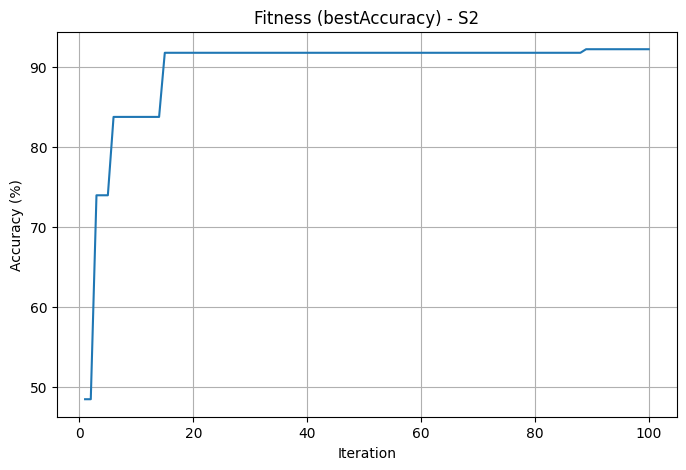

In [ ]:
# =========================
# 8. Convergence graph of best SVM (Figure 1)
# =========================
best_idx = table_df["Best Accuracy (%)"].astype(float).idxmax()
best_sample = table_df.loc[best_idx, "Sample"]
best_history = histories[best_idx]

print(f"Best sample: {best_sample}")
display(table_df.loc[[best_idx]])

plt.figure(figsize=(8,5))
plt.plot(range(1, len(best_history)+1), best_history)
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.title(f"Fitness (bestAccuracy) - {best_sample}")
plt.grid(True)
plt.show()


In [ ]:
# =========================
# 9. Save results for GitHub (optional)
# =========================
table_df.to_csv("optimized_svm_results_letter_subset.csv", index=False)

best_hist_df = pd.DataFrame({
    "Iteration": np.arange(1, len(best_history)+1),
    "BestAccuracy": best_history
})
best_hist_df.to_csv("best_sample_convergence_subset.csv", index=False)

print("Saved:")
print("- optimized_svm_results_letter_subset.csv")
print("- best_sample_convergence_subset.csv")


Saved:
- optimized_svm_results_letter_subset.csv
- best_sample_convergence_subset.csv
